# 90 sets models
In this notebook we are creating models for using on the data that are a concatenation of 90 sets in total and the individuals parameters

In [3]:
from helpers import print_mean_squared_error, print_coefficient_of_determination

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split

L = []

for i in range(90):
    L.append(f"rep{i}")
    L.append(f"weight{i}")

L2 = ["age", "person_weight", "gender", "pre-performance", "performance"]
L += L2

# Read the CSV file.
data = pd.read_csv("./data/regression_dataframes2.csv", names=L)

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

Y = data_shuffled['performance']
Y.head()

# Split into input part X and output part Y.
X = data_shuffled.drop('performance', axis=1)

# # Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)


In [102]:
X.head()

,rep0,weight0,rep1,weight1,rep2,weight2,rep3,weight3,rep4,weight4,...,rep87,weight87,rep88,weight88,rep89,weight89,age,person_weight,gender,pre-performance
26,8.0,36.0,8.0,36.0,8.0,36.0,8.0,36.0,12.0,34.0,...,8.0,46.0,8.0,46.0,8.0,46.0,21.0,89.0,2.0,48.0
86,8.0,41.0,8.0,41.0,8.0,41.0,8.0,41.0,8.0,42.0,...,8.0,53.0,8.0,53.0,12.0,50.0,18.0,66.0,2.0,55.0
2,8.0,27.0,8.0,27.0,8.0,27.0,8.0,27.0,12.0,26.0,...,12.0,32.0,12.0,32.0,12.0,32.0,46.0,107.0,0.0,36.0
55,5.0,30.0,5.0,30.0,5.0,30.0,5.0,30.0,5.0,30.0,...,12.0,35.0,12.0,35.0,12.0,35.0,22.0,104.0,0.0,38.0
75,12.0,24.0,12.0,24.0,12.0,24.0,12.0,24.0,8.0,26.0,...,12.0,31.0,12.0,31.0,12.0,31.0,50.0,61.0,1.0,35.0


Explained variation per principal component: [0.62424181 0.0619431  0.03172018]


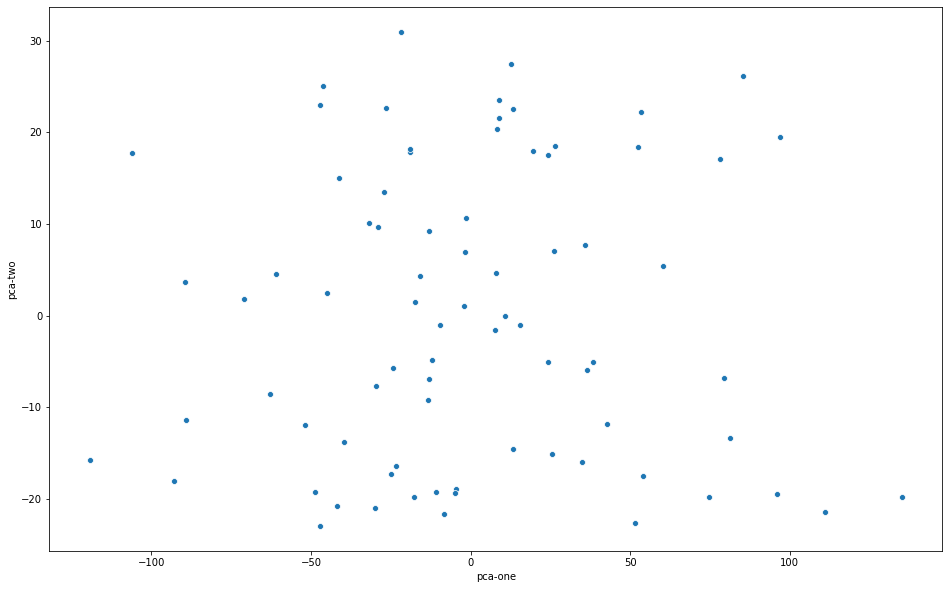

In [101]:
# plotting the data using PCA
from visualizers import model_plotter
model_plotter.Reducer_plotter.pca_plot(Xtrain)


# Basic linear regression

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Träna modellen
lr = LinearRegression()
lr.fit(Xtrain,Ytrain)

#Använd på testsettet
Ypred = lr.predict(Xtest)

lr_mean_squared_error = mean_squared_error(Ytest, Ypred)
lr_r2_score = r2_score(Ytest, Ypred)

print_mean_squared_error(lr_mean_squared_error)
print_coefficient_of_determination(lr_r2_score)



Mean squared error: 0.40
Coefficient of determination: 0.99


## Ridge regression

In [12]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(Xtrain, Ytrain)
# Ridge()
ridge_Ypred = ridge.predict(Xtest)

ridge_mean_squared_error = mean_squared_error(Ytest, ridge_Ypred)
ridge_r2_score = r2_score(Ytest, ridge_Ypred)

print_mean_squared_error(ridge_mean_squared_error)
print_coefficient_of_determination(ridge_r2_score)

Mean squared error: 0.38
Coefficient of determination: 0.99


In [13]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(Xtrain,Ytrain)
lasso_Ypred = lasso.predict(Xtest)

lasso_mean_squared_error = mean_squared_error(Ytest, lasso_Ypred)
lasso_r2_score = r2_score(Ytest, lasso_Ypred)

print_mean_squared_error(lasso_mean_squared_error)
print_coefficient_of_determination(lasso_r2_score)

Mean squared error: 0.63
Coefficient of determination: 0.99


## Summaries of the result

In [14]:
print("Normal linear regression:")
print_mean_squared_error(lr_mean_squared_error)
print_coefficient_of_determination(lr_r2_score)
print("\n")

print("Ridge regression:")
print_mean_squared_error(ridge_mean_squared_error)
print_coefficient_of_determination(ridge_r2_score)
print("\n")

print("Lasso regression:")
print_mean_squared_error(lasso_mean_squared_error)
print_coefficient_of_determination(lasso_r2_score)
print("\n")




Normal linear regression:
Mean squared error: 0.40
Coefficient of determination: 0.99


Ridge regression:
Mean squared error: 0.38
Coefficient of determination: 0.99


Lasso regression:
Mean squared error: 0.63
Coefficient of determination: 0.99


